# Hebbian Learning Algorithm

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)

    def activate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)
        return weighted_sum

    def hebbian(self, inputs, lr):
        activation = self.activate(inputs)
        # implement hebbian rule: weights += lr * activation * inputs
        self.weights+= lr * activation * inputs

    def covariance(self, inputs, lr):
        activation = self.activate(inputs)
        # implement covariance rule: weights += lr * (activation - predicted_output) * inputs
        self.weights += lr * (activation - np.mean(activation)) * inputs

if __name__ == "__main__":
    num = 3
    neuron = Neuron(num)
    inputs = np.array([0.5,0.3,0.2])
    lr = 0.1
    iterations = 1000
    for i in range(iterations):
        neuron.hebbian(inputs, lr)
    print("Learned weights : ", neuron.weights)

Learned weights :  [6.44604052e+15 3.86762431e+15 2.57841621e+15]


# Differentiate between co-variance and hebbian learning

In [8]:
if __name__ == "__main__":
    num = 3
    neuron = Neuron(num)
    inputs = np.array([0.5, 0.3, 0.2])
    lr = 0.1
    iterations = 1000
    
    hebbian_weights = np.copy(neuron.weights)
    covariance_weights = np.copy(neuron.weights)
    
    hebbian_history = [np.copy(hebbian_weights)]
    covariance_history = [np.copy(covariance_weights)]
    
    # hebbian learning
    for i in range(iterations):
        neuron.hebbian(inputs, lr)
        hebbian_history.append(np.copy(neuron.weights))
    
    # resetting the neuron
    neuron.weights = np.copy(covariance_weights)
    
    # covariance-based learning
    for i in range(iterations):
        neuron.covariance(inputs, lr)
        covariance_history.append(np.copy(neuron.weights))
    
    hebbian_history = np.array(hebbian_history)
    covariance_history = np.array(covariance_history)

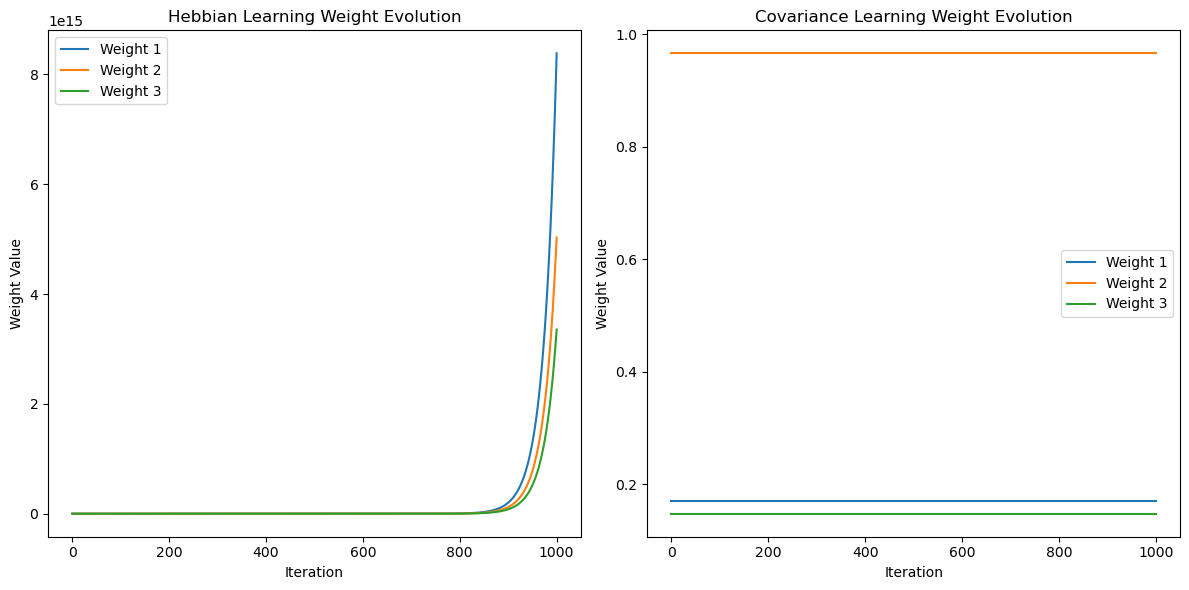

Learned weights after Hebbian learning:  [8.38327431e+15 5.02996459e+15 3.35330972e+15]
Learned weights after Covariance-based learning:  [0.17021443 0.96601332 0.14773546]


In [10]:
# plotting the graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(num):
    plt.plot(hebbian_history[:, i], label=f"Weight {i+1}")
plt.title("Hebbian Learning Weight Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(num):
    plt.plot(covariance_history[:, i], label=f"Weight {i+1}")
plt.title("Covariance Learning Weight Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.legend()

plt.tight_layout()
plt.show()

print("Learned weights after Hebbian learning: ", hebbian_history[-1])
print("Learned weights after Covariance-based learning: ", covariance_history[-1])